## Generate synthetic data for linear regression

Create a function that generates a synthetic dataset for linear regression. The function should take the number of samples, the slope, the intercept, and noise as arguments, and return a NumPy array of input values (X) and corresponding output values (Y).

$Y=\beta_{0}+\beta_{1}X+\epsilon$

In [1]:
import numpy as np

def generate_synthetic_data(n_samples, slope, intercept, noise_std_dev,seed_value):
    # Generate X values as a column vector
    np.random.seed(seed_value)
    X = np.random.rand(n_samples, 1)
    # Generate error terms as a column vector
    epsilon=np.random.randn(n_samples, 1)

    # Generate Y values with noise
    Y = slope * X + intercept + noise_std_dev *epsilon

    # Return X and Y as a numpy array
    return X,Y

In [2]:
#create a data of 100 observations
X, Y = generate_synthetic_data(100, 2, 5, 1,2023)

## Implement simple linear regression using the normal equation

Implement simple linear regression using the normal equation, and fit a model to the synthetic data generated in Exercise 1.

In [3]:
def normal_equation(X, Y):
    #add constant term for X
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    #closed form solution
    coefficients= np.linalg.inv(X.T@X)@(X.T@Y)
    alpha=round(coefficients[0][0],4)
    beta=round(coefficients[1:][0][0],4)
    return alpha,beta

In [4]:
intercept_estimate,slope_estimate = normal_equation(X, Y)
print(intercept_estimate,slope_estimate,sep='\n')

4.8741
2.2771


## Use scikit-learn for linear regression

Use the scikit-learn library to fit a linear regression model to the synthetic data generated in Exercise 1, and compare the results with the models obtained in Exercises 2.

In [5]:
from sklearn.linear_model import LinearRegression

def sklearn_linear_regression(X, Y):
    # Your code here
    reg = LinearRegression().fit(X, Y)
    intercept_estimate = reg.intercept_[0].round(4)
    slope_estimate = reg.coef_[0][0].round(4)
    Y_pred=reg.predict(X)
    return intercept_estimate, slope_estimate,Y_pred


In [6]:
intercept_estimate_sklearn, slope_estimate_sklearn,Y_pred_sklearn = sklearn_linear_regression(X, Y)
print(intercept_estimate_sklearn,slope_estimate_sklearn,sep='\n')
#sk learn provides same answer as closed form solution

4.8741
2.2771


## Evaluate model performance

Create a function that calculates the Mean Squared Error (MSE) and R-squared score for a given set of true output values (Y) and predicted output values (Y_pred).

In [7]:
from sklearn import metrics

def evaluate_model(Y, Y_pred):

    mse = metrics.mean_squared_error(Y, Y_pred).round(4)
    #rmse = np.sqrt(metrics.mean_squared_error(Y, Y_pred))
    r2=metrics.r2_score(Y,Y_pred).round(4)
    return mse, r2

In [8]:
mse, r2 = evaluate_model(Y, Y_pred_sklearn)
print(mse, r2,sep='\n')

0.954
0.2839


In [9]:
import matplotlib.pyplot as plt
def plot_linear_regression(X,Y_pred):

    #set figure size
    plt.figure(figsize=(12,8))

    # Plot the scatter plot of X and Y
    plt.scatter(X, Y, color='blue')

    # Plot the linear regression line
    plt.plot(X, Y_pred, color='red')

    # Add axis labels and a title to the plot
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Linear Regression')

    # Show the plot
    plt.show()

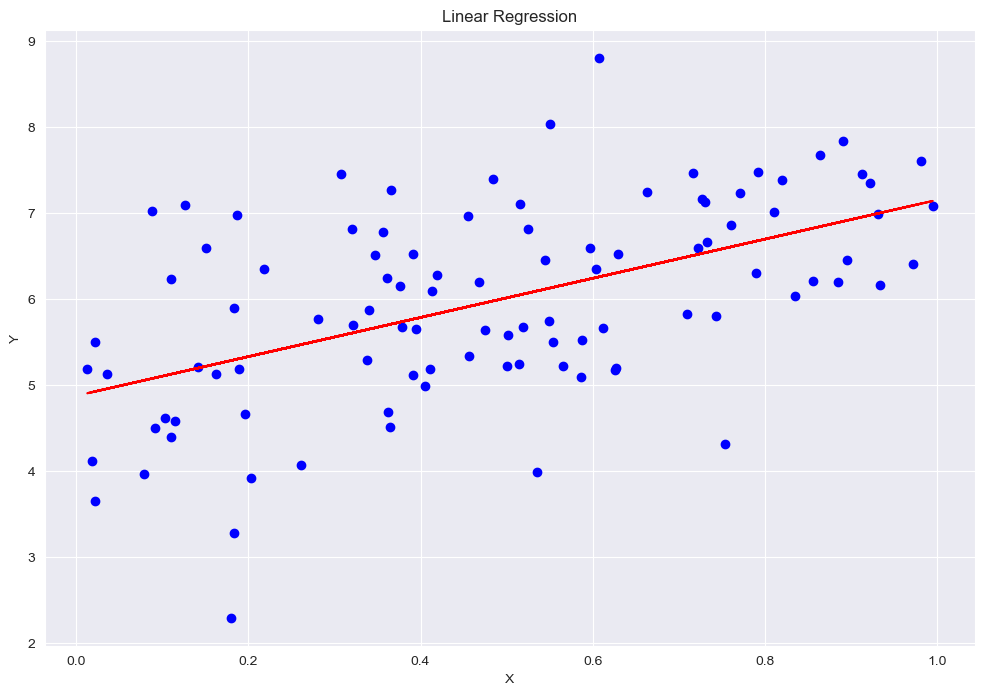

In [10]:
#Visual Representation of Linear Regression Line
plot_linear_regression(X, Y_pred_sklearn )